Reference: https://www.kaggle.com/code/ekaterinadranitsyna/segformer-water-segmentation-pytorch/notebook

In [ ]:
!pip install transformers datasets
!pip install --upgrade sympy
!pip install --upgrade datasets
!pip install evaluate
!pip install transformers
!pip install torchmetrics

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 480.6/480.6 kB 2.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 116.3/116.3 kB 10.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 179.3/179.3 kB 13.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 134.8/134.8 kB 11.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 194.1/194.1 kB 16.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
import os

# ZIP ÌååÏùº Í≤ΩÎ°ú
zip_path = "/content/drive/MyDrive/car_damage_data_v.zip"
output_dir = "/content/data"  # ZIP ÌååÏùºÏùÑ ÌíÄ ÎîîÎ†âÌÜ†Î¶¨
os.makedirs(output_dir, exist_ok=True)

# ZIP ÌååÏùº Ìï¥Ï†ú
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(output_dir)

print(f"ZIP ÌååÏùºÏù¥ Ìï¥Ï†úÎêòÏóàÏäµÎãàÎã§: {output_dir}")

ZIP ÌååÏùºÏù¥ Ìï¥Ï†úÎêòÏóàÏäµÎãàÎã§: /content/data


In [ ]:
# Split Sample Data Into train/valid/test
import os
import shutil
from sklearn.model_selection import train_test_split

# Í≤ΩÎ°ú ÏÑ§Ï†ï
base_dir = "/content/data/valid"
image_dir = "/content/data/valid/image"
label_dir = "/content/data/valid/label"
output_dir = "/content/sample_data/Split_data"
os.makedirs(output_dir, exist_ok = True)

# Ï∂úÎ†• Ìè¥Îçî ÏÉùÏÑ±
for split in ["train", "valid", "test"]:
    os.makedirs(os.path.join(output_dir, split, "images"), exist_ok=True)
    os.makedirs(os.path.join(output_dir, split, "labels"), exist_ok=True)

# Ïù¥ÎØ∏ÏßÄÏôÄ ÎùºÎ≤® ÌååÏùº Í∞ÄÏ†∏Ïò§Í∏∞
images = sorted(os.listdir(image_dir))
labels = sorted(os.listdir(label_dir))

# Ïù¥ÎØ∏ÏßÄÏôÄ ÎùºÎ≤® ÌååÏùº Îß§Ïπ≠
print(len(images), len(labels))
assert len(images) == len(labels), "Ïù¥ÎØ∏ÏßÄÏôÄ ÎùºÎ≤®Ïùò Í∞úÏàòÍ∞Ä ÏùºÏπòÌïòÏßÄ ÏïäÏäµÎãàÎã§."
data_pairs = list(zip(images, labels))

# Îç∞Ïù¥ÌÑ∞Î•º 7:1.5:1.5Î°ú ÎÇòÎàÑÍ∏∞
train_pairs, temp_pairs = train_test_split(data_pairs, test_size=0.3, random_state=42)
valid_pairs, test_pairs = train_test_split(temp_pairs, test_size=0.5, random_state=42)

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ∞∞ Ìï®Ïàò
def copy_files(pairs, split):
    for image_file, label_file in pairs:
        # ÌååÏùº Í≤ΩÎ°ú Ï†ïÏùò
        src_image_path = os.path.join(image_dir, image_file)
        src_label_path = os.path.join(label_dir, label_file)
        dest_image_path = os.path.join(output_dir, split, "images", image_file)
        dest_label_path = os.path.join(output_dir, split, "labels", label_file)

        # ÌååÏùº Î≥µÏÇ¨
        shutil.copy(src_image_path, dest_image_path)
        shutil.copy(src_label_path, dest_label_path)

# ÌååÏùº Î≥µÏÇ¨
copy_files(train_pairs, "train")
copy_files(valid_pairs, "valid")
copy_files(test_pairs, "test")

print("Îç∞Ïù¥ÌÑ∞Í∞Ä ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Î∂ÑÌï†ÎêòÏóàÏäµÎãàÎã§!")

10089 10089
Îç∞Ïù¥ÌÑ∞Í∞Ä ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Î∂ÑÌï†ÎêòÏóàÏäµÎãàÎã§!


In [ ]:
import os
import json
from PIL import Image, ImageDraw
from tqdm import tqdm  # ÏßÑÌñâ ÏÉÅÌô© ÌëúÏãú

# Îç∞Ïù¥ÌÑ∞ÏÖãÏùò ÏÉÅÏúÑ ÎîîÎ†âÌÜ†Î¶¨ÏôÄ Ï∂úÎ†• ÎîîÎ†âÌÜ†Î¶¨ ÏÑ§Ï†ï
dataset_dir = "/content/sample_data/Split_data"
output_base_dir = "/content/data/masks"
os.makedirs(output_base_dir, exist_ok=True)

# Îç∞Ïù¥ÌÑ∞ÏÖãÏùò train, valid, test Í∞ÅÍ∞Å Ï≤òÎ¶¨
for split in ["train", "valid", "test"]:
    # JSON ÌååÏùºÏù¥ ÏûàÎäî ÎîîÎ†âÌÜ†Î¶¨
    json_dir = os.path.join(dataset_dir, split, "labels")
    if not os.path.exists(json_dir):
        print(f"{split} ÎîîÎ†âÌÜ†Î¶¨Í∞Ä ÏóÜÏäµÎãàÎã§: {json_dir}")
        continue

    # ÎßàÏä§ÌÅ¨ Ï†ÄÏû• ÎîîÎ†âÌÜ†Î¶¨
    output_dir = os.path.join(output_base_dir, split)
    os.makedirs(output_dir, exist_ok=True)

    # JSON ÎîîÎ†âÌÜ†Î¶¨ ÏàúÌöå
    for json_file in tqdm(os.listdir(json_dir), desc=f"Processing {split}"):
        if not json_file.endswith(".json"):
            continue  # JSON ÌååÏùºÎßå Ï≤òÎ¶¨

        # JSON ÌååÏùº Í≤ΩÎ°ú
        json_path = os.path.join(json_dir, json_file)

        # JSON Îç∞Ïù¥ÌÑ∞ Î°úÎìú
        with open(json_path, "r") as f:
            data = json.load(f)

        # Ïù¥ÎØ∏ÏßÄ Ï†ïÎ≥¥ Í∞ÄÏ†∏Ïò§Í∏∞
        image_info = data["images"]
        image_width, image_height = image_info["width"], image_info["height"]
        image_file = image_info["file_name"]

        # Îπà ÎßàÏä§ÌÅ¨ ÏÉùÏÑ± (Î∞∞Í≤ΩÏùÄ 0ÏúºÎ°ú ÏÑ§Ï†ï)
        mask = Image.new("L", (image_width, image_height), 0)  # "L"ÏùÄ ÌùëÎ∞± Ïù¥ÎØ∏ÏßÄÎ•º ÏùòÎØ∏
        draw = ImageDraw.Draw(mask)

        # Ïñ¥ÎÖ∏ÌÖåÏù¥ÏÖò Ï≤òÎ¶¨
        for ann in data["annotations"]:
            # "damage"Í∞Ä ÏûàÏúºÎ©¥ 1Î°ú Ï≤òÎ¶¨
            if "damage" in ann and ann["damage"] is not None:
                segmentation = ann["segmentation"][0][0]  # Îã§Í∞ÅÌòï Ï¢åÌëú
                polygons = [tuple(point) for point in segmentation]  # (x, y) ÌäúÌîåÎ°ú Î≥ÄÌôò

                # "damage" Î∂ÄÎ∂ÑÎßå 1Î°ú ÌëúÏãú
                draw.polygon(polygons, fill=1)  # damage Î∂ÄÎ∂ÑÏùÑ 1Î°ú Ï±ÑÏö∞Í∏∞

        # ÎßàÏä§ÌÅ¨ Ï†ÄÏû•
        mask_output_path = os.path.join(output_dir, f"{os.path.splitext(image_file)[0]}_mask.png")
        mask.save(mask_output_path)

Processing test: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1514/1514 [00:08<00:00, 168.51it/s]


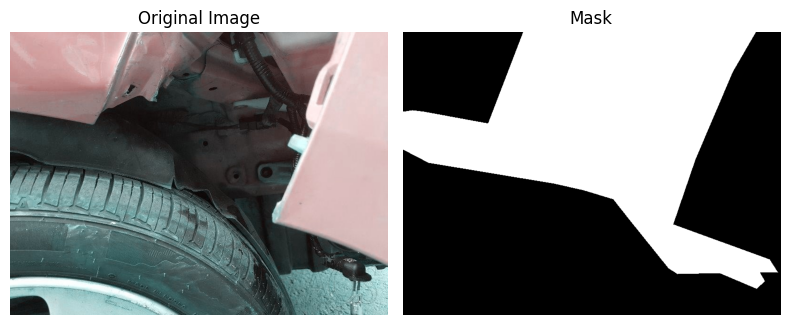

In [ ]:
# Mask Print
import matplotlib.pyplot as plt
import cv2

# ÌååÏùº Í≤ΩÎ°ú ÏßÄÏ†ï
imagefile = '/content/sample_data/Split_data/train/images/0506239_as-3483186.jpg'
maskfile = '/content/data/masks/train/0506239_as-3483186_mask.png'

# Ïù¥ÎØ∏ÏßÄÏôÄ ÎßàÏä§ÌÅ¨ Î∂àÎü¨Ïò§Í∏∞
image = cv2.imread(imagefile)  # Ïª¨Îü¨ Ïù¥ÎØ∏ÏßÄ
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # BGR -> RGB Î≥ÄÌôò
mask = cv2.imread(maskfile, cv2.IMREAD_GRAYSCALE)  # Grayscale ÎßàÏä§ÌÅ¨

# Ïù¥ÎØ∏ÏßÄÏôÄ ÎßàÏä§ÌÅ¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 8))

# ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ ÌëúÏãú
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')  # Ï∂ï Ïà®Í∏∞Í∏∞

# ÎßàÏä§ÌÅ¨ Ïù¥ÎØ∏ÏßÄ ÌëúÏãú
plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')  # GrayscaleÎ°ú ÌëúÏãú
plt.title("Mask")
plt.axis('off')  # Ï∂ï Ïà®Í∏∞Í∏∞

plt.tight_layout()  # Î†àÏù¥ÏïÑÏõÉ Ï°∞Ï†ï
plt.show()

In [ ]:
!pip install wandb
import wandb
wandb.login()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
!pip install evaluate
import os
from datasets import Dataset
from transformers import TrainingArguments, Trainer
import torch
from PIL import Image
from transformers import SegformerImageProcessor, SegformerForSemanticSegmentation

processor = SegformerImageProcessor()

# GPU ÏÇ¨Ïö© ÏÑ§Ï†ï
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Îç∞Ïù¥ÌÑ∞ Í≤ΩÎ°ú ÏÑ§Ï†ï
train_images_dir = "/content/sample_data/Split_data/train/images"
train_masks_dir = "/content/data/masks/train"

val_images_dir = "/content/sample_data/Split_data/valid/images"
val_masks_dir = "/content/data/masks/valid"

# Î∞∞Í≤Ω ÌÅ¥ÎûòÏä§ Ìè¨Ìï®
label_mapping = {'Background': 0, 'Damaged': 1}

# id2label Î∞è label2id ÏÉùÏÑ±
id2label = {v: k for k, v in label_mapping.items()}  # ID -> Label
label2id = {k: v for k, v in label_mapping.items()}  # Label -> ID

# Ï∂úÎ†• ÌôïÏù∏
print("id2label:", id2label)
print("label2id:", label2id)

# ÎùºÎ≤® Í∞úÏàò
num_labels = len(id2label)
print("Number of labels:", num_labels)

id2label: {0: 'Background', 1: 'Damaged'}
label2id: {'Background': 0, 'Damaged': 1}
Number of labels: 2


In [ ]:
# Model
import requests
import torch
from PIL import Image
from transformers import AutoImageProcessor, MobileViTV2ForSemanticSegmentation

model_name = "apple/mobilevitv2-1.0-imagenet1k-256"
processor = AutoImageProcessor.from_pretrained(model_name)
model = MobileViTV2ForSemanticSegmentation.from_pretrained(
    model_name,
    num_labels = 2,
    id2label=id2label,
    label2id=label2id

)

model.to(device)  # Î™®Îç∏ÏùÑ GPUÎ°ú Ïù¥Îèô

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/69.8k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/19.8M [00:00<?, ?B/s]

Some weights of MobileViTV2ForSemanticSegmentation were not initialized from the model checkpoint at apple/mobilevitv2-1.0-imagenet1k-256 and are newly initialized: ['segmentation_head.aspp.convs.0.convolution.weight', 'segmentation_head.aspp.convs.0.normalization.bias', 'segmentation_head.aspp.convs.0.normalization.num_batches_tracked', 'segmentation_head.aspp.convs.0.normalization.running_mean', 'segmentation_head.aspp.convs.0.normalization.running_var', 'segmentation_head.aspp.convs.0.normalization.weight', 'segmentation_head.aspp.convs.1.convolution.weight', 'segmentation_head.aspp.convs.1.normalization.bias', 'segmentation_head.aspp.convs.1.normalization.num_batches_tracked', 'segmentation_head.aspp.convs.1.normalization.running_mean', 'segmentation_head.aspp.convs.1.normalization.running_var', 'segmentation_head.aspp.convs.1.normalization.weight', 'segmentation_head.aspp.convs.2.convolution.weight', 'segmentation_head.aspp.convs.2.normalization.bias', 'segmentation_head.aspp.conv

MobileViTV2ForSemanticSegmentation(
  (mobilevitv2): MobileViTV2Model(
    (conv_stem): MobileViTV2ConvLayer(
      (convolution): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (normalization): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (activation): SiLU()
    )
    (encoder): MobileViTV2Encoder(
      (layer): ModuleList(
        (0): MobileViTV2MobileNetLayer(
          (layer): ModuleList(
            (0): MobileViTV2InvertedResidual(
              (expand_1x1): MobileViTV2ConvLayer(
                (convolution): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
                (normalization): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                (activation): SiLU()
              )
              (conv_3x3): MobileViTV2ConvLayer(
                (convolution): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)


In [ ]:
# Ï¥ù ÌååÎùºÎØ∏ÌÑ∞ Ïàò Î∞è ÌïôÏäµ Í∞ÄÎä•Ìïú ÌååÎùºÎØ∏ÌÑ∞ Ïàò Í≥ÑÏÇ∞
def count_parameters(model):
    total_params = sum(p.numel() for p in model.parameters())  # Ï†ÑÏ≤¥ ÌååÎùºÎØ∏ÌÑ∞ Ïàò
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)  # ÌïôÏäµ Í∞ÄÎä•Ìïú ÌååÎùºÎØ∏ÌÑ∞ Ïàò
    return total_params, trainable_params

# Conditional DETR Î™®Îç∏ Î°úÎìú ÌõÑ ÌååÎùºÎØ∏ÌÑ∞ Ïàò Í≥ÑÏÇ∞
total_params, trainable_params = count_parameters(model)

print(f"Total Parameters: {total_params:,}")  # Ï≤ú Îã®ÏúÑ Íµ¨Î∂ÑÏûêÎ°ú ÌëúÏãú
print(f"Trainable Parameters: {trainable_params:,}")


Total Parameters: 13,308,907
Trainable Parameters: 13,308,907


In [ ]:
processor

MobileViTImageProcessor {
  "crop_size": {
    "height": 256,
    "width": 256
  },
  "do_center_crop": true,
  "do_flip_channel_order": true,
  "do_rescale": true,
  "do_resize": true,
  "image_processor_type": "MobileViTImageProcessor",
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "shortest_edge": 288
  }
}

In [ ]:
# Load Dataset & Preprocessing

def load_data(images_dir, masks_dir):
    images = sorted(os.listdir(images_dir))
    masks = sorted(os.listdir(masks_dir))

    data = []
    for img_name, mask_name in zip(images, masks):
        image_path = os.path.join(images_dir, img_name)
        mask_path = os.path.join(masks_dir, mask_name)
        data.append({"image": image_path, "mask": mask_path})
    return data

train_data = load_data(train_images_dir, train_masks_dir)
val_data = load_data(val_images_dir, val_masks_dir)

# Îç∞Ïù¥ÌÑ∞ÏÖã Ï§ÄÎπÑ
def preprocess(example):
    image = Image.open(example["image"]).convert("RGB").resize((512, 512))  # 512x512Î°ú Ï∂ïÏÜå
    mask = Image.open(example["mask"]).resize((512, 512))
    encoding = processor(image, mask, return_tensors="pt")
    encoding = {k: v.squeeze(0).to(device) for k, v in encoding.items()}
    return encoding


train_dataset = Dataset.from_list(train_data).map(preprocess)
val_dataset = Dataset.from_list(val_data).map(preprocess)

Map:   0%|          | 0/7062 [00:00<?, ? examples/s]

Map:   0%|          | 0/1513 [00:00<?, ? examples/s]

In [ ]:
from datasets import Dataset
import os

# Google ÎìúÎùºÏù¥Î∏å Í≤ΩÎ°ú ÏÑ§Ï†ï
output_dir = "/content/drive/MyDrive/dataset_cache"

# ÎîîÎ†âÌÜ†Î¶¨ ÏÉùÏÑ± (Ïù¥ÎØ∏ ÏûàÎã§Î©¥ Î¨¥Ïãú)
os.makedirs(output_dir, exist_ok=True)

# Îç∞Ïù¥ÌÑ∞ÏÖã Ï†ÄÏû•
train_dataset.save_to_disk(os.path.join(output_dir, "train_dataset"))
val_dataset.save_to_disk(os.path.join(output_dir, "val_dataset"))

print("Datasets saved to Google Drive!")


Saving the dataset (0/19 shards):   0%|          | 0/7062 [00:00<?, ? examples/s]

Saving the dataset (0/4 shards):   0%|          | 0/1513 [00:00<?, ? examples/s]

Datasets saved to Google Drive!


In [ ]:
# Evaluation Metrics
import torch
from torch import nn
import evaluate

metric = evaluate.load("mean_iou")

def compute_metrics(eval_pred):
  with torch.no_grad():
    logits, labels = eval_pred
    logits_tensor = torch.from_numpy(logits)
    # scale the logits to the size of the label
    logits_tensor = nn.functional.interpolate(
        logits_tensor,
        size=labels.shape[-2:],
        mode="bilinear",
        align_corners=False,
    ).argmax(dim=1)

    pred_labels = logits_tensor.detach().cpu().numpy()
    metrics = metric.compute(
        predictions=pred_labels,
        references=labels,
        num_labels=len(id2label),
        ignore_index=None,
    )

    # add per category metrics as individual key-value pairs
    per_category_accuracy = metrics.pop("per_category_accuracy").tolist()
    per_category_iou = metrics.pop("per_category_iou").tolist()

    metrics.update({f"accuracy_{id2label[i]}": v for i, v in enumerate(per_category_accuracy)})
    metrics.update({f"iou_{id2label[i]}": v for i, v in enumerate(per_category_iou)})

    return metrics

In [ ]:
from transformers import TrainingArguments

epochs = 3
lr = 5e-5
batch_size = 4

training_args = TrainingArguments(
    "/content/mobilevitv2-finetuned--outputs",
    learning_rate=lr,
    num_train_epochs=epochs,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    save_total_limit=3,
    evaluation_strategy="steps",
    save_strategy="steps",
    save_steps=500,
    eval_steps=500,
    logging_steps=1,
    eval_accumulation_steps=5,
    load_best_model_at_end=True,
)

# Trainer Ï†ïÏùò
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
)

# ÌïôÏäµ ÏãúÏûë
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Currently logged in as: ksm030415 (ksm030415-sungkyunkwan-university). Use `wandb login --relogin` to force relogin


/usr/local/lib/python3.10/dist-packages/datasets/features/image.py:348: UserWarning: Downcasting array dtype int64 to int32 to be compatible with 'Pillow'
  warnings.warn(f"Downcasting array dtype {dtype} to {dest_dtype} to be compatible with 'Pillow'")
/usr/local/lib/python3.10/dist-packages/datasets/features/image.py:348: UserWarning: Downcasting array dtype int64 to int32 to be compatible with 'Pillow'
  warnings.warn(f"Downcasting array dtype {dtype} to {dest_dtype} to be compatible with 'Pillow'")
/usr/local/lib/python3.10/dist-packages/datasets/features/image.py:348: UserWarning: Downcasting array dtype int64 to int32 to be compatible with 'Pillow'
  warnings.warn(f"Downcasting array dtype {dtype} to {dest_dtype} to be compatible with 'Pillow'")
/usr/local/lib/python3.10/dist-packages/datasets/features/image.py:348: UserWarning: Downcasting array dtype int64 to int32 to be compatible with 'Pillow'
  warnings.warn(f"Downcasting array dtype {dtype} to {dest_dtype} to be compatible 

TrainOutput(global_step=5298, training_loss=0.23904387403255636, metrics={'train_runtime': 6395.6983, 'train_samples_per_second': 3.313, 'train_steps_per_second': 0.828, 'total_flos': 3.326165035670569e+17, 'train_loss': 0.23904387403255636, 'epoch': 3.0})

In [ ]:
train_images_dir = "/content/sample_data/Split_data/train/images"
train_masks_dir = "/content/data/masks/train"

test_images_dir = '/content/sample_data/Split_data/test/images'
test_masks_dir = '/content/data/masks/test'
test_data = load_data(test_images_dir, test_masks_dir)
test_dataset = Dataset.from_list(test_data).map(preprocess)

# ÌÖåÏä§Ìä∏ ÌèâÍ∞Ä
test_result = trainer.evaluate(eval_dataset=test_dataset)

# ÌÖåÏä§Ìä∏ Í≤∞Í≥º Ï∂úÎ†•
print("Test Results:")
for key, value in test_result.items():
    print(f"{key}: {value}")

Map:   0%|          | 0/1514 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/datasets/features/image.py:348: UserWarning: Downcasting array dtype int64 to int32 to be compatible with 'Pillow'
  warnings.warn(f"Downcasting array dtype {dtype} to {dest_dtype} to be compatible with 'Pillow'")


Test Results:
eval_loss: 0.22619828581809998
eval_mean_iou: 0.5583640116887623
eval_mean_accuracy: 0.6052652984212572
eval_overall_accuracy: 0.9149906858900264
eval_accuracy_Background: 0.991830735300967
eval_accuracy_Damaged: 0.21869986154154739
eval_iou_Background: 0.9131018525272311
eval_iou_Damaged: 0.20362617085029355
eval_runtime: 286.5984
eval_samples_per_second: 5.283
eval_steps_per_second: 1.322
epoch: 3.0


## Download

In [ ]:
import shutil

# ÌäπÏ†ï Ï≤¥ÌÅ¨Ìè¨Ïù∏Ìä∏ ÎîîÎ†âÌÜ†Î¶¨ Í≤ΩÎ°ú
checkpoint_dir = "/content/mobilevitv2-finetuned--outputs/checkpoint-5000"

# ÏïïÏ∂ïÌï† ÌååÏùº Ïù¥Î¶ÑÍ≥º Í≤ΩÎ°ú
output_zip = "/content/checkpoint-5000.zip"

# ÎîîÎ†âÌÜ†Î¶¨Î•º ÏïïÏ∂ï
shutil.make_archive(output_zip.replace(".zip", ""), 'zip', checkpoint_dir)


'/content/checkpoint-5000.zip'

In [ ]:
from google.colab import files

# ÏïïÏ∂ïÎêú Ï≤¥ÌÅ¨Ìè¨Ïù∏Ìä∏ Îã§Ïö¥Î°úÎìú
files.download(output_zip)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Inference

In [ ]:
ls /content/mobilevitv2-finetuned--outputs

checkpoint-4500/  checkpoint-5000/  checkpoint-5298/  runs/


In [ ]:
import os

# Í∞Å Ï≤¥ÌÅ¨Ìè¨Ïù∏Ìä∏ ÎîîÎ†âÌÜ†Î¶¨ ÎÇ¥Ïö© ÌôïÏù∏
print("Checkpoint 4500:")
print(os.listdir("/content/mobilevitv2-finetuned--outputs/checkpoint-4500/"))

print("Checkpoint 5000:")
print(os.listdir("/content/mobilevitv2-finetuned--outputs/checkpoint-5000/"))

print("Checkpoint 5298:")
print(os.listdir("/content/mobilevitv2-finetuned--outputs/checkpoint-5298/"))

Checkpoint 4500:
['scheduler.pt', 'rng_state.pth', 'optimizer.pt', 'config.json', 'model.safetensors', 'training_args.bin', 'trainer_state.json']
Checkpoint 5000:
['scheduler.pt', 'rng_state.pth', 'optimizer.pt', 'config.json', 'model.safetensors', 'training_args.bin', 'trainer_state.json']
Checkpoint 5298:
['scheduler.pt', 'rng_state.pth', 'optimizer.pt', 'config.json', 'model.safetensors', 'training_args.bin', 'trainer_state.json']


In [ ]:
!pip install safetensors
from safetensors.torch import load_file
import torch
from PIL import Image
import requests
from transformers import AutoImageProcessor, MobileViTV2ForSemanticSegmentation

# Model & Processor
model_name_inference = "/content/mobilevitv2-finetuned--outputs/checkpoint-5298/config.json"
processor_inference = AutoImageProcessor.from_pretrained("apple/mobilevitv2-1.0-imagenet1k-256")
model_weights_inference = load_file("/content/mobilevitv2-finetuned--outputs/checkpoint-5298/model.safetensors")
model_inference = MobileViTV2ForSemanticSegmentation.from_pretrained("apple/mobilevitv2-1.0-imagenet1k-256",
    config=model_name_inference)
model_inference.load_state_dict(model_weights_inference)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Inference
model_inference.eval()
model_inference.to(device)

Some weights of the model checkpoint at apple/mobilevitv2-1.0-imagenet1k-256 were not used when initializing MobileViTV2ForSemanticSegmentation: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing MobileViTV2ForSemanticSegmentation from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MobileViTV2ForSemanticSegmentation from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of MobileViTV2ForSemanticSegmentation were not initialized from the model checkpoint at apple/mobilevitv2-1.0-imagenet1k-256 and are newly initialized: ['segmentation_head.aspp.convs.0.convolution.weight', 'segmentation_head.aspp.convs.0.normalization.bias', 'segmentation_head.aspp.convs.0.normali

MobileViTV2ForSemanticSegmentation(
  (mobilevitv2): MobileViTV2Model(
    (conv_stem): MobileViTV2ConvLayer(
      (convolution): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (normalization): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (activation): SiLU()
    )
    (encoder): MobileViTV2Encoder(
      (layer): ModuleList(
        (0): MobileViTV2MobileNetLayer(
          (layer): ModuleList(
            (0): MobileViTV2InvertedResidual(
              (expand_1x1): MobileViTV2ConvLayer(
                (convolution): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
                (normalization): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                (activation): SiLU()
              )
              (conv_3x3): MobileViTV2ConvLayer(
                (convolution): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)


In [ ]:
# Demo
image = Image.open("/content/drive/MyDrive/0569396_sc-208278.jpg").convert("RGB").resize((512, 512))  # ÏòàÏãú Ïù¥ÎØ∏ÏßÄ


inputs = processor(images=image, return_tensors="pt").to(device)


with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits

print(f"logit shape : {logits.shape}")
predictions = torch.argmax(logits, dim=1).squeeze(0)
print(f"after prediction and squeezing, segmap shape: {predictions.shape}")

logit shape : torch.Size([1, 2, 8, 8])
after prediction and squeezing, segmap shape: torch.Size([8, 8])


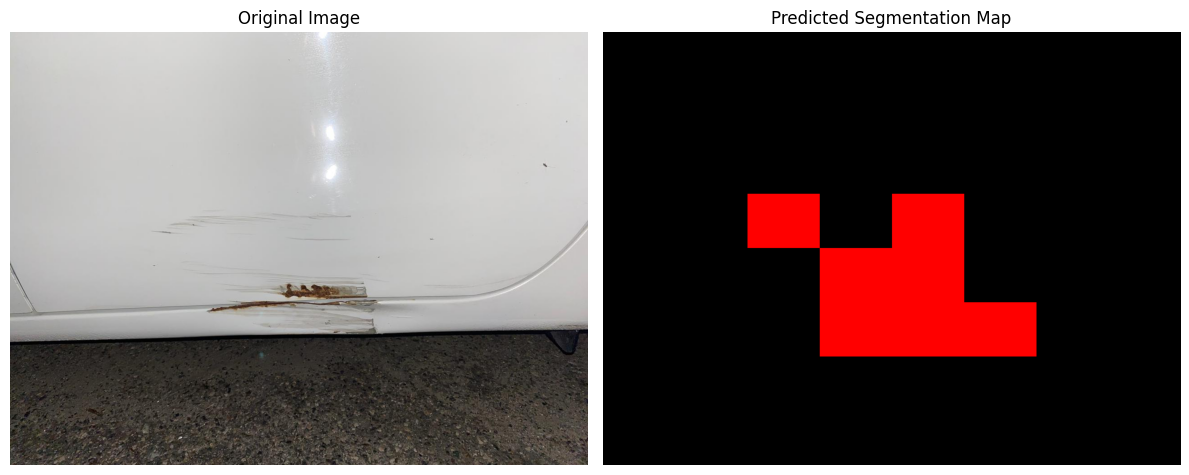

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

colors = [
    [0, 0, 0],      # Background
    [255, 0, 0]     # Damaged
]

image_path = "/content/drive/MyDrive/0569396_sc-208278.jpg"  # ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ ÌååÏùº Í≤ΩÎ°ú

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

predictions = predictions.cpu().numpy()

# ÏÑ∏Í∑∏Î©òÌÖåÏù¥ÏÖò ÎßµÏùÑ ÏÉâÏÉÅÏúºÎ°ú Î≥ÄÌôò
colored_map = np.zeros((predictions.shape[0], predictions.shape[1], 3), dtype=np.uint8)
for class_id, color in enumerate(colors):
    colored_map[predictions == class_id] = color

colored_map_resized = cv2.resize(colored_map, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)

plt.figure(figsize=(12, 12))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(colored_map_resized)
plt.title("Predicted Segmentation Map")
plt.axis("off")

plt.tight_layout()
plt.show()